## Configuración inicial

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [3]:
# Cargamos el dataset
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Preprocesamiento

In [4]:
# Revisando los datos

train_images.shape

(60000, 28, 28)

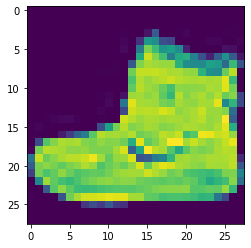

In [5]:
plt.imshow(train_images[0]);

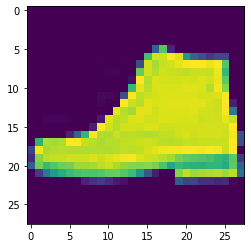

In [6]:
plt.imshow(train_images[42]);

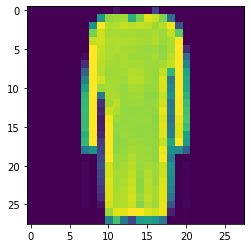

In [7]:
plt.imshow(train_images[25]);

In [8]:
# Reescalar los valores
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [9]:
# Cambiar las dimensiones de los datos de train y test
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [10]:
# Cambiamos los labels to categóricos
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

## Modelo

In [11]:
# Instanciamos el modelo
model = tf.keras.Sequential()

# Agregamos capas a nuestra Red Neuronal
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

# Apilamos capas pero de forma decreciente
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

# Esta capa aplana los tensores
model.add(Flatten())

# Stackeamos capas densas
model.add(Dense(256, activation='relu'))

# Reducimos el Overfitting
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

## Compilamos el modelo

In [12]:
# Compilamos
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

## Entrenamos el modelo

In [13]:
# Entrenamos
model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 22s 11ms/step - loss: 0.5800 - accuracy: 0.7883
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 0.3913 - accuracy: 0.8597
Epoch 3/10
938/938 [==============================] - 10s 10ms/step - loss: 0.3490 - accuracy: 0.8747
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3283 - accuracy: 0.8815
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3170 - accuracy: 0.8872
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3136 - accuracy: 0.8886
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3091 - accuracy: 0.8908
Epoch 8/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3135 - accuracy: 0.8900
Epoch 9/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3115 - accuracy: 0.8903
Epoch 10/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3125 - acc

## Evaluamos el modelo

In [14]:
# Evaluamos
model.evaluate(test_images, test_labels, verbose=0)

[0.281972199678421, 0.9065999984741211]